# 1. Import libraries

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import json
from six.moves.urllib.request import urlopen
from google.colab import files
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import metrics
import bz2 # bz2 for compression
import pickle # pickle for writing/reading model to/from a file

# 2. Data processing

## 2.1. Get the list of Bike Stations

In [ ]:
# UPDATE:
# From 26/8/2021, the API https://dublinbikes.staging.derilinx.com/api/v1
# has been shut down. You can not get data from the API.
# So the data will be loaded from the CSV file that I already collected from
# this API in June/2021

# ----------------------------------------------------------------------
# Get the list of Bike Stations
#url = 'https://dublinbikes.staging.derilinx.com/api/v1/resources/stations'
#urlResponse = urlopen(url)
#if hasattr(urlResponse.headers, 'get_content_charset'):
#    encoding = urlResponse.headers.get_content_charset('utf-8')
#else:
#    encoding = urlResponse.headers.getparam('charset') or 'utf-8'
#data = json.loads(urlResponse.read().decode(encoding))
#stations_df = pd.DataFrame.from_dict(data, orient="columns")
# ----------------------------------------------------------------------

stations_df = pd.read_csv("drive/MyDrive/dublinbikes/datasets/station_list.csv")
stations_df

,address,station_id,latitude,longitude,name
0,Clarendon Row,1,53.340927,-6.262501,CLARENDON ROW
1,Blessington Street,2,53.356770,-6.268140,BLESSINGTON STREET
2,Bolton Street,3,53.351181,-6.269859,BOLTON STREET
3,Greek Street,4,53.346874,-6.272976,GREEK STREET
4,Charlemont Street,5,53.330662,-6.260177,CHARLEMONT PLACE
...,...,...,...,...,...
111,Merrion Square South,113,53.338615,-6.248606,MERRION SQUARE SOUTH
112,Wilton Terrace (Park),114,53.333652,-6.248345,WILTON TERRACE (PARK)
113,Killarney Street,115,53.354843,-6.247579,KILLARNEY STREET
114,Broadstone,116,53.354698,-6.272314,BROADSTONE


[7 9 2 2 3 7 7 4 7 7 3 9 8 7 9 4 7 3 8 8 4 4 4 8 8 8 9 2 9 2 1 4 3 2 8 3 4
 3 2 3 2 3 9 4 2 8 1 1 2 7 3 3 3 3 8 8 8 9 9 9 1 8 1 1 1 1 1 1 1 3 7 7 7 0
 0 2 9 9 6 6 6 6 6 6 0 0 0 8 1 1 0 0 0 6 6 6 8 1 0 2 9 5 5 5 5 5 5 4 5 9 9
 8 8 4 5 1]


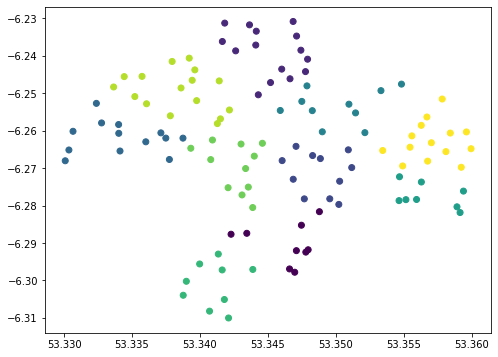

In [ ]:
# Convert stations_df data to an Array for K-Means processing
# Initial a List
data = []
# Loop all rows of station_features_df and append these data to the List "data"
for i in stations_df.index:
  data.append([stations_df['latitude'][i],stations_df['longitude'][i]])
# Convern a List to an Array
data = np.array(data)

# Initial K-Means model with 10 clustering
# (the model will cluster the input data into 10 groups)
model = KMeans(n_clusters=10)
# Scale the data to normalize it for good results
model = model.fit(scale(data))
# We can look at the clusters each data point was assigned to
print(model.labels_)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(int))
plt.show()

In [ ]:
# Save cluster_number information into each Bike Station
stations_df['cluster'] = 0

for i in range(0, len(stations_df)):
  stations_df.loc[i,'cluster'] = model.labels_[i]

stations_df

,address,station_id,latitude,longitude,name,cluster
0,Clarendon Row,1,53.340927,-6.262501,CLARENDON ROW,7
1,Blessington Street,2,53.356770,-6.268140,BLESSINGTON STREET,9
2,Bolton Street,3,53.351181,-6.269859,BOLTON STREET,2
3,Greek Street,4,53.346874,-6.272976,GREEK STREET,2
4,Charlemont Street,5,53.330662,-6.260177,CHARLEMONT PLACE,3
...,...,...,...,...,...,...
111,Merrion Square South,113,53.338615,-6.248606,MERRION SQUARE SOUTH,8
112,Wilton Terrace (Park),114,53.333652,-6.248345,WILTON TERRACE (PARK),8
113,Killarney Street,115,53.354843,-6.247579,KILLARNEY STREET,4
114,Broadstone,116,53.354698,-6.272314,BROADSTONE,5


In [ ]:
# Save the clustering info of Bike Stations into a file
stations_df.to_csv('drive/MyDrive/dublinbikes/clustered_stations.csv', index=False)

## 2.2. Weather data in Dublin City

In [ ]:
# I've already connected my Google Drive

# Read dataset from CSV files that are stored in my Google Drive
weather1 = pd.read_csv("drive/MyDrive/dublinbikes/datasets/Dublin_weather_Jan2020_Jun2021_part1.csv")
weather2 = pd.read_csv("drive/MyDrive/dublinbikes/datasets/Dublin_weather_Jan2020_Jun2021_part2.csv")
weather3 = pd.read_csv("drive/MyDrive/dublinbikes/datasets/Dublin_weather_Jan2020_Jun2021_part3.csv")
weather4 = pd.read_csv("drive/MyDrive/dublinbikes/datasets/Dublin_weather_Jan2020_Jun2021_part4.csv")
weather5 = pd.read_csv("drive/MyDrive/dublinbikes/datasets/Dublin_weather_Jan2020_Jun2021_part5.csv")
weather6 = pd.read_csv("drive/MyDrive/dublinbikes/datasets/Dublin_weather_Jan2020_Jun2021_part6.csv")
weather7 = pd.read_csv("drive/MyDrive/dublinbikes/datasets/Dublin_weather_Jan2020_Jun2021_part7.csv")
weather8 = pd.read_csv("drive/MyDrive/dublinbikes/datasets/Dublin_weather_Jan2020_Jun2021_part8.csv")

# Combine the data of these CSV files into a dataframe
weather = pd.concat([weather1, weather2], ignore_index=True)
weather = pd.concat([weather, weather3], ignore_index=True)
weather = pd.concat([weather, weather4], ignore_index=True)
weather = pd.concat([weather, weather5], ignore_index=True)
weather = pd.concat([weather, weather6], ignore_index=True)
weather = pd.concat([weather, weather7], ignore_index=True)
weather = pd.concat([weather, weather8], ignore_index=True)

# Drop duplicated rows ()
weather.drop_duplicates(inplace=True)

# To merge the Weather data with the historic Bike-availability data,
# we need to create a field "time_interval" with format: YYYYMMDDHHmm
# YYYY: Year; MM: Month; DD: Day; HH: Hour; mm: Minute 
weather['time_interval'] = weather['Date time'].apply(lambda x: \
                            int(x[6:10] + x[0:2] + x[3:5] + x[11:13] + x[14:16]))

# Remove irrelevant columns
weather.drop(['Date time', 'Name', 'Maximum Temperature', \
              'Minimum Temperature', 'Wind Chill', 'Heat Index',	\
              'Precipitation',	'Snow',	'Snow Depth', 'Visibility',	\
              'Cloud Cover'], axis=1, inplace = True)

# Standardize the column names
weather.rename(columns={'Temperature':'temperature',	'Wind Speed':'wind_speed',	\
                        'Wind Direction':'wind_direction', 'Wind Gust':'wind_gust', \
                        'Relative Humidity':'humidity', 'Conditions':'conditions'}, inplace=True)

weather

,temperature,wind_speed,wind_direction,wind_gust,humidity,conditions,time_interval
0,6.6,3.5,67.0,5.5,84.47,Overcast,202001010000
1,6.3,2.8,44.0,4.6,84.14,Clear,202001010005
2,6.3,2.3,44.0,2.8,84.51,Clear,202001010010
3,6.3,1.9,44.0,2.8,84.73,Clear,202001010015
4,6.3,1.9,44.0,2.4,84.73,Clear,202001010020
...,...,...,...,...,...,...,...
157527,14.6,2.3,19.0,4.2,88.36,Clear,202106302340
157528,14.6,3.1,25.0,4.1,88.22,Clear,202106302345
157529,14.4,3.5,21.0,5.3,88.42,Clear,202106302350
157530,14.3,3.0,18.0,5.7,88.11,Clear,202106302355


## 2.3. Covid-19 datasets (daily confirmed new cases)

2.3.1. In the whole Ireland

In [ ]:
# Read data from the CSV file
covid_ireland = pd.read_csv("drive/MyDrive/dublinbikes/datasets/CovidStatisticsProfileHPSCIrelandOpenData.csv") 

# Keep relevant columns only
covid_ireland = covid_ireland[['Date',	'ConfirmedCovidCases']]

# Standardize the column names
covid_ireland.rename(columns={'Date':'date', \
                              'ConfirmedCovidCases':'ie_confirmed_cases'}, inplace=True)

# To merge the Covid-19 data with the historic Bike-availability data,
# we need to replace the format of date with: YYYYMMDD
# YYYY: Year; MM: Month; DD: Day
covid_ireland['date'] = covid_ireland['date'].apply(lambda x: x[0:4] + x[5:7] + x[8:10])

covid_ireland

,date,ie_confirmed_cases
0,20200229,1
1,20200303,1
2,20200304,4
3,20200305,7
4,20200306,5
...,...,...
510,20210725,1126
511,20210726,1345
512,20210727,1120
513,20210728,1408


2.3.2. In Dublin city only

In [ ]:
# Read data from the CSV file
covid_counties = pd.read_csv("drive/MyDrive/dublinbikes/datasets/COVID-19_County_Statistics_HPSC_Ireland_(Point_Geometry)_.csv") 

# Filter data for Dublin City & Get 2 relevant columns 
covid_dublin = covid_counties[covid_counties['CountyName'] == 'Dublin'][['ConfirmedCovidCases', 'TimeStampDate']]
# NOTE: the value of ConfirmedCovidCases is the accumulated confirmed new cases.
# It's not the daily confirmed new cases.

# Standardize the column names
covid_dublin.rename(columns={'TimeStampDate':'date', \
                             'ConfirmedCovidCases':'dublin_accumulated_confirmed_cases'}, \
                    inplace=True)

# To merge the Covid-19 data with the historic Bike-availability data,
# we need to replace the format of date with: YYYYMMDD
# YYYY: Year; MM: Month; DD: Day
covid_dublin['date'] = covid_dublin['date'].apply(lambda x: x[0:4] + x[5:7] + x[8:10])

# The original dataset has some duplicated rows that need to be removed
covid_dublin.drop_duplicates(inplace=True)

# After removing some rows, we need to reset the index of the dataframe
covid_dublin.reset_index(drop=True, inplace=True)

# Replace NA value with 0 (i.e. before Feb 2020, there is no Covid-19 cases in Dublin)
covid_dublin['dublin_accumulated_confirmed_cases'].fillna(value=0, inplace=True)

# Calculate the daily confirmed new cases
s = covid_dublin['dublin_accumulated_confirmed_cases'].copy()
a = s.pop(0)
s2 = pd.Series([s[len(s)]])
s = s.append(s2)
s = s.reset_index(drop=True)
covid_dublin['dublin_accumulated_confirmed_cases_of_the_next_date'] = s
covid_dublin['dublin_confirmed_cases'] = covid_dublin['dublin_accumulated_confirmed_cases_of_the_next_date'] \
                                          - covid_dublin['dublin_accumulated_confirmed_cases']

# Keep relevant columns only
covid_dublin = covid_dublin[['date', 'dublin_confirmed_cases']]

covid_dublin

,date,dublin_confirmed_cases
0,20200227,0.0
1,20200301,1.0
2,20200302,0.0
3,20200303,0.0
4,20200304,0.0
...,...,...
434,20210508,180.0
435,20210509,166.0
436,20210510,226.0
437,20210511,0.0


## 2.4. Get the historic Bike-avaibility dataset

In [ ]:
# Read data from the CSV file
df1 = pd.read_csv("drive/MyDrive/dublinbikes/datasets/dublinbikes_2020_Quarter_1_2.csv")
df2 = pd.read_csv("drive/MyDrive/dublinbikes/datasets/dublinbikes_2020_Quarter_3_4.csv")
df3 = pd.read_csv("drive/MyDrive/dublinbikes/datasets/dublinbikes_2021_Quarter_1_2.csv")

# Combine the data of these CSV files into a dataframe
df = pd.concat([df1, df2], ignore_index=True)
df = pd.concat([df, df3], ignore_index=True)

# Drop duplicated rows ()
df.drop_duplicates(inplace=True)

# Not examining periods when the Bike Sation is temporarily closed
df = df[df['status'] == 'open']

In [ ]:
print('Number of rows:',len(df))
print('Example data:')
df.head()

Number of rows: 16479103
Example data:


,station_id,latitude,longitude,available_bike_stands,available_bikes,bike_stands,status,date,hour,minute,time_interval
0,2,53.35677,-6.26814,18,2,20,open,20200101,6,25,202001010625
1,2,53.35677,-6.26814,18,2,20,open,20200101,6,30,202001010630
2,2,53.35677,-6.26814,18,2,20,open,20200101,6,35,202001010635
3,2,53.35677,-6.26814,20,0,20,open,20200101,6,40,202001010640
4,2,53.35677,-6.26814,20,0,20,open,20200101,6,45,202001010645


In [ ]:
# Back up the df for 
original_df = df.copy()

In [ ]:
#df = original_df.copy()

#3. Examine a Cluster (i.e., cluster=0)

## 3.1. Filter/Tranform/Merge/Dummy data

In [ ]:
# Filter data for a Cluster
def data_clustering(_df, _stations, _cluster_no):
  station_list = np.array(_stations[_stations['cluster'] == _cluster_no]['station_id'])
  _df = _df[_df['station_id'].isin(station_list)]
  return _df

In [ ]:
# Run the function above
cluster = 0
df = data_clustering(df, stations_df, cluster)
# Data after filtering
df

,station_id,latitude,longitude,available_bike_stands,available_bikes,bike_stands,status,date,hour,minute,time_interval
3099312,75,53.343456,-6.287409,35,5,40,open,20200101,6,25,202001010625
3099313,75,53.343456,-6.287409,35,5,40,open,20200101,6,30,202001010630
3099314,75,53.343456,-6.287409,35,5,40,open,20200101,6,35,202001010635
3099315,75,53.343456,-6.287409,35,5,40,open,20200101,6,40,202001010640
3099316,75,53.343456,-6.287409,35,5,40,open,20200101,6,45,202001010645
...,...,...,...,...,...,...,...,...,...,...,...
15610944,100,53.347107,-6.292041,4,21,25,open,20210630,23,35,202106302335
15610945,100,53.347107,-6.292041,4,21,25,open,20210630,23,40,202106302340
15610946,100,53.347107,-6.292041,4,21,25,open,20210630,23,45,202106302345
15610947,100,53.347107,-6.292041,4,21,25,open,20210630,23,50,202106302350


In [ ]:
def transform_data(_df):
  _df['weekday'] = _df['date'].apply(lambda x: \
                                     dt.datetime.strptime(str(x), '%Y%m%d').weekday())


  _df['is_weekend'] = _df['weekday'].apply(lambda x: 1 if (x >= 5) else 0)

  weekdays = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
  _df['weekday'] = _df['weekday'].map(weekdays)

  _df['hour'] = _df['hour'].astype(int)
  _df['minute'] = _df['minute'].astype(int)
  _df['hour'] = _df['hour'] + _df['minute']/60

  return _df

In [ ]:
# Run the function above
df = transform_data(df)
# Data after transformation
df.head()

,station_id,latitude,longitude,available_bike_stands,available_bikes,bike_stands,status,date,hour,minute,time_interval,weekday,is_weekend
3099312,75,53.343456,-6.287409,35,5,40,open,20200101,6.416667,25,202001010625,Wed,0
3099313,75,53.343456,-6.287409,35,5,40,open,20200101,6.500000,30,202001010630,Wed,0
3099314,75,53.343456,-6.287409,35,5,40,open,20200101,6.583333,35,202001010635,Wed,0
3099315,75,53.343456,-6.287409,35,5,40,open,20200101,6.666667,40,202001010640,Wed,0
3099316,75,53.343456,-6.287409,35,5,40,open,20200101,6.750000,45,202001010645,Wed,0


In [ ]:
def merge_data(_df, _weather, _covid_ireland, _covid_dublin):
  # Merge datasets together
  _df['time_interval'] = _df['time_interval'].astype(int)
  _weather['time_interval'] = _weather['time_interval'].astype(int)

  _df = _df.merge(_weather, how='left', on='time_interval')

  _df['date'] = _df['date'].astype(int)
  _covid_ireland['date'] = _covid_ireland['date'].astype(int)

  _df = _df.merge(_covid_ireland, how='left', on='date')

  _covid_dublin['date'] = _covid_dublin['date'].astype(int)
  _df = _df.merge(_covid_dublin, how='left', on='date')

  # Replace NA value with 0 (i.e. before Feb 2020, there is no Covid-19 cases in Ireland)
  _df['ie_confirmed_cases'].fillna(value=0, inplace=True)
  _df['dublin_confirmed_cases'].fillna(value=0, inplace=True)

  # Remove irrelevant columns
  _df.drop(columns=['latitude',	'longitude', \
                    'available_bike_stands', 'bike_stands', \
                    'minute', 'time_interval', 'status'], inplace=True)

  return _df

In [ ]:
# Run the function above
df = merge_data(df, weather, covid_ireland, covid_dublin)
# Data after merge
df.head()

,station_id,available_bikes,date,hour,weekday,is_weekend,temperature,wind_speed,wind_direction,wind_gust,humidity,conditions,ie_confirmed_cases,dublin_confirmed_cases
0,75,5,20200101,6.416667,Wed,0,1.9,2.4,56.0,3.3,92.12,Clear,0.0,0.0
1,75,5,20200101,6.500000,Wed,0,1.9,2.7,57.0,3.4,92.53,Overcast,0.0,0.0
2,75,5,20200101,6.583333,Wed,0,2.2,2.6,58.0,3.5,92.73,Clear,0.0,0.0
3,75,5,20200101,6.666667,Wed,0,2.2,2.3,58.0,3.0,92.73,Clear,0.0,0.0
4,75,5,20200101,6.750000,Wed,0,2.2,2.3,58.0,3.1,92.73,Clear,0.0,0.0


In [ ]:
# Convert categorical variable into indicator variables

def dummy_data(_df):
  # Not dummy "date"
  _df['date'] = _df['date'].astype(int)

  # Dummy all categorical variables (column types is string)
  # i.e., station, weekday; conditions
  _df['station_id'] = _df['station_id'].astype(str)
  _df = pd.get_dummies(_df)

  return _df

In [ ]:
# Run the function above
df = dummy_data(df)
# Data after dummies
df.head(5)

,available_bikes,date,hour,is_weekend,temperature,wind_speed,wind_direction,wind_gust,humidity,ie_confirmed_cases,dublin_confirmed_cases,station_id_100,station_id_75,station_id_76,station_id_86,station_id_87,station_id_88,station_id_92,station_id_93,station_id_94,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,5,20200101,6.416667,0,1.9,2.4,56.0,3.3,92.12,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,5,20200101,6.500000,0,1.9,2.7,57.0,3.4,92.53,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,5,20200101,6.583333,0,2.2,2.6,58.0,3.5,92.73,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,5,20200101,6.666667,0,2.2,2.3,58.0,3.0,92.73,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,20200101,6.750000,0,2.2,2.3,58.0,3.1,92.73,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


## 3.2 Data Exploration

3.2.1. Describe the data

In [ ]:
df.describe()

,available_bikes,date,hour,is_weekend,temperature,wind_speed,wind_direction,wind_gust,humidity,ie_confirmed_cases,dublin_confirmed_cases,station_id_100,station_id_75,station_id_76,station_id_86,station_id_87,station_id_88,station_id_92,station_id_93,station_id_94,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
count,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.348595e+06,1.348073e+06,1.346894e+06,1.317401e+06,1.348595e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06,1.351691e+06
mean,1.296993e+01,2.020398e+07,1.196364e+01,2.865574e-01,9.761576e+00,6.853366e+00,2.112458e+02,1.229779e+01,8.311157e+01,5.141985e+02,1.708477e+02,1.109566e-01,1.110816e-01,1.112421e-01,1.110002e-01,1.116616e-01,1.108582e-01,1.108626e-01,1.111593e-01,1.111778e-01,1.425984e-01,1.419074e-01,1.431636e-01,1.433937e-01,1.419881e-01,1.440277e-01,1.429210e-01,8.524478e-01,5.073349e-02,1.601254e-02,6.543729e-02,1.120596e-02,1.872469e-03
std,9.023085e+00,4.586702e+03,6.940479e+00,4.521531e-01,4.992902e+00,4.375581e+00,1.108352e+02,7.645064e+00,1.082499e+01,9.254572e+02,3.238619e+02,3.140785e-01,3.142333e-01,3.144319e-01,3.141325e-01,3.149498e-01,3.139565e-01,3.139621e-01,3.143294e-01,3.143523e-01,3.496630e-01,3.489553e-01,3.502398e-01,3.504740e-01,3.490380e-01,3.511180e-01,3.499924e-01,3.546557e-01,2.194530e-01,1.255235e-01,2.472960e-01,1.052635e-01,4.323152e-02
min,0.000000e+00,2.020010e+07,0.000000e+00,0.000000e+00,-6.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.407000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,2.020053e+07,5.916667e+00,0.000000e+00,6.300000e+00,3.400000e+00,1.080000e+02,6.400000e+00,7.780000e+01,5.700000e+01,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.200000e+01,2.020101e+07,1.200000e+01,0.000000e+00,9.700000e+00,6.200000e+00,2.550000e+02,1.120000e+01,8.613000e+01,3.340000e+02,9.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.900000e+01,2.021022e+07,1.800000e+01,1.000000e+00,1.320000e+01,9.500000e+00,3.030000e+02,1.670000e+01,9.124000e+01,5.390000e+02,2.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+01,2.021063e+07,2.391667e+01,1.000000e+00,2.530000e+01,2.890000e+01,3.600000e+02,5.360000e+01,1.000000e+02,8.248000e+03,3.654000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


3.2.2. Check the correlation between variables

In [ ]:
numeric_list = ['available_bikes',
                'hour',	
                'is_weekend',	
                'temperature',	
                'wind_speed',	
                'wind_direction',	
                'wind_gust',	
                'humidity',	
                'ie_confirmed_cases',	
                'dublin_confirmed_cases']
df[numeric_list].corr()

,available_bikes,hour,is_weekend,temperature,wind_speed,wind_direction,wind_gust,humidity,ie_confirmed_cases,dublin_confirmed_cases
available_bikes,1.000000,-0.037896,0.027514,-0.086503,-0.001431,0.017290,0.002506,0.065509,-0.072025,-0.069447
hour,-0.037896,1.000000,0.001033,0.212486,0.126212,-0.023452,0.125565,-0.312324,-0.001534,-0.001476
is_weekend,0.027514,0.001033,1.000000,-0.005446,0.049135,-0.036837,0.039233,-0.045598,0.012892,-0.007294
temperature,-0.086503,0.212486,-0.005446,1.000000,0.167746,-0.030920,0.177098,-0.391482,-0.360317,-0.363002
wind_speed,-0.001431,0.126212,0.049135,0.167746,1.000000,0.021023,0.974579,-0.191313,-0.100415,-0.089166
wind_direction,0.017290,-0.023452,-0.036837,-0.030920,0.021023,1.000000,0.043568,0.029662,0.004916,0.001297
wind_gust,0.002506,0.125565,0.039233,0.177098,0.974579,0.043568,1.000000,-0.199108,-0.104592,-0.091506
humidity,0.065509,-0.312324,-0.045598,-0.391482,-0.191313,0.029662,-0.199108,1.000000,0.188992,0.156685
ie_confirmed_cases,-0.072025,-0.001534,0.012892,-0.360317,-0.100415,0.004916,-0.104592,0.188992,1.000000,0.845127
dublin_confirmed_cases,-0.069447,-0.001476,-0.007294,-0.363002,-0.089166,0.001297,-0.091506,0.156685,0.845127,1.000000


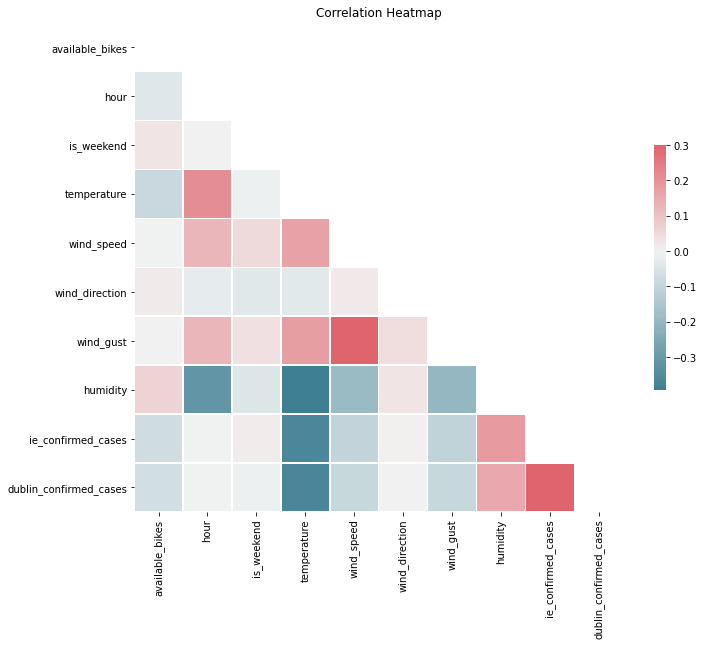

In [ ]:
# Show correlation heatmap
corr = df[numeric_list].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

3.2.3. Identify and remove outliers

In [ ]:
# Backup the data with outliers
df_with_outliers = df.copy()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


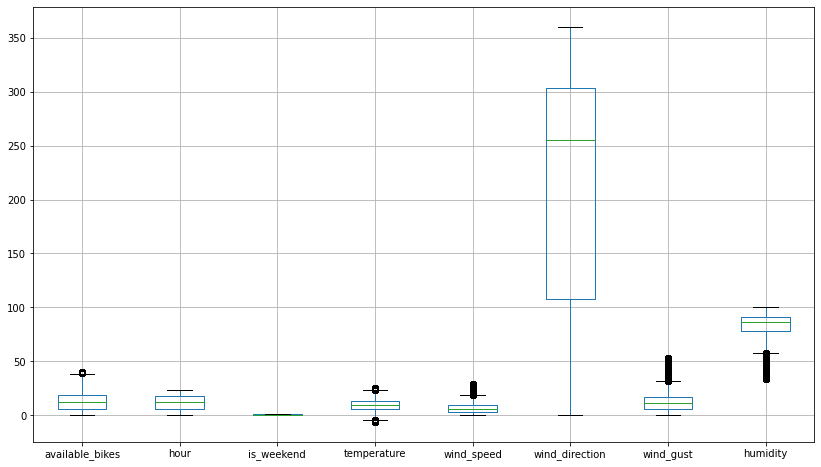

In [ ]:
# Check the outliers
plt.figure(figsize=(14,8))
df.boxplot(column=['available_bikes',	'hour', 'is_weekend', \
                   'temperature',	'wind_speed',	'wind_direction',	\
                   'wind_gust', 'humidity'])

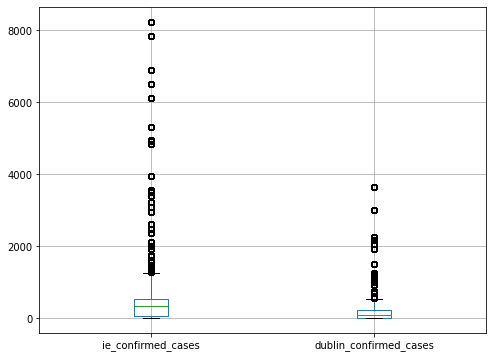

In [ ]:
plt.figure(figsize=(8,6))
df.boxplot(column=['ie_confirmed_cases', 'dublin_confirmed_cases'])

In [ ]:
def remove_outliers(_df):
  #Replacing the outlier data values with NULL
  for x in ['available_bikes', 'temperature', 'wind_speed', 'wind_gust', \
            'humidity', 'ie_confirmed_cases', 'dublin_confirmed_cases']:
    q75,q25 = np.percentile(_df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    _df.loc[_df[x] < min,x] = np.nan
    _df.loc[_df[x] > max,x] = np.nan

  # Remove outliers
  _df.dropna(axis = 0, inplace=True)

  return _df

In [ ]:
# Run the function above
#print('Data length before removing outliers:', len(df))
#df = remove_outliers(df)
#print('Data length afer removing outliers:', len(df))

##3.3. Data Modelling

3.3.1 Data featuring

In [ ]:
# List of features (predictors)
features = df.columns.to_list()
features.remove('date')
features.remove('available_bikes')
features

# Remove remaining NA rows 
df.dropna(inplace=True)

# Data for modelling is ready
y = df['available_bikes']
X = df[features]

3.3.2. Split data into training & testing

In [ ]:
# Split into traning and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

3.3.3. Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

3.3.4. Build a Random Rorest model

In [ ]:
# Let's try with n_estimators=10 ==> using 10 Decision Trees
model = RandomForestClassifier(n_estimators=10)

model = model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

# Show metrics & the prediction accuracy
print("MAE:", metrics.mean_absolute_error(y_test, y_prediction))
print("MSE:", metrics.mean_squared_error(y_test, y_prediction))
print("RMSE:", metrics.mean_squared_error(y_test, y_prediction)**0.5)
print("R2:", metrics.r2_score(y_test, y_prediction))
print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))

MAE: 0.501099384901106
MSE: 2.8973485720647436
RMSE: 1.7021599725245402
R2: 0.9641400053717751
Accuracy: 0.7674288562601683


4.1.5. Examine the importances of predictors

In [ ]:
percentages = list(model.feature_importances_)
# Merge variables and percentages
feature_percent = [(f, round(p*100, 2)) for f, p in zip(features, percentages)]
# Sort by the most contribution
feature_percent = sorted(feature_percent, key = lambda x: x[1], reverse = True)
# Show the data
print('Contribution percentage of variables:')
[print('{:40} {}%'.format(*pair)) for pair in feature_percent];

Contribution percentage of variables:
hour                                     14.26%
temperature                              12.47%
humidity                                 12.06%
wind_direction                           10.11%
ie_confirmed_cases                       10.0%
wind_gust                                9.73%
wind_speed                               8.91%
dublin_confirmed_cases                   8.74%
station_id_76                            1.03%
station_id_75                            0.97%
station_id_87                            0.87%
weekday_Thu                              0.87%
weekday_Tue                              0.84%
weekday_Fri                              0.82%
weekday_Wed                              0.81%
weekday_Mon                              0.79%
station_id_88                            0.71%
conditions_Clear                         0.68%
station_id_93                            0.65%
is_weekend                               0.58%
station_id_94     

4.1.6. Check the diffrence between the actual and predicted values

In [ ]:
test_vs_pred = pd.concat([y_test, pd.DataFrame(y_prediction, \
                                               columns=['predicted_bikes'], \
                                               index=y_test.index)], axis=1)
test_vs_pred['difference'] = test_vs_pred['available_bikes'] - test_vs_pred['predicted_bikes']
test_vs_pred.reset_index(drop=True, inplace=True)
test_vs_pred.describe()

,available_bikes,predicted_bikes,difference
count,395221.000000,395221.000000,395221.000000
mean,12.967127,12.836211,0.130917
std,8.988678,8.998368,1.697120
min,0.000000,0.000000,-36.000000
25%,6.000000,6.000000,0.000000
50%,12.000000,11.000000,0.000000
75%,19.000000,18.000000,0.000000
max,40.000000,40.000000,39.000000


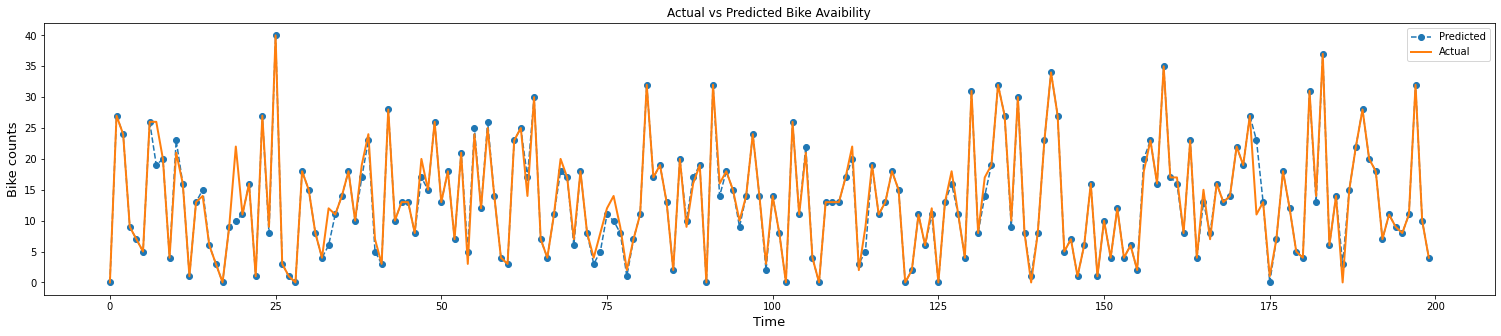

In [ ]:
# Compare actual & predicted
# i.e. plot the first 200 rows
plt.figure(figsize=(26,5))
plt.plot(test_vs_pred['predicted_bikes'][:200], marker='o', \
         markersize=6, linestyle='dashed', label='Predicted')
plt.plot(test_vs_pred['available_bikes'][:200], linewidth=2, label='Actual')
plt.title('Actual vs Predicted Bike Avaibility')
plt.xlabel('Time', size=13)
plt.ylabel('Bike counts', size=13)
plt.legend()
plt.show()

4.1.7. Observe actual & predicted data of a particular day

MAE: 0.18055555555555555
MSE: 0.4513888888888889
RMSE: 0.6718548123582124
R2: 0.9834127180680424
Accuracy: 0.8993055555555556


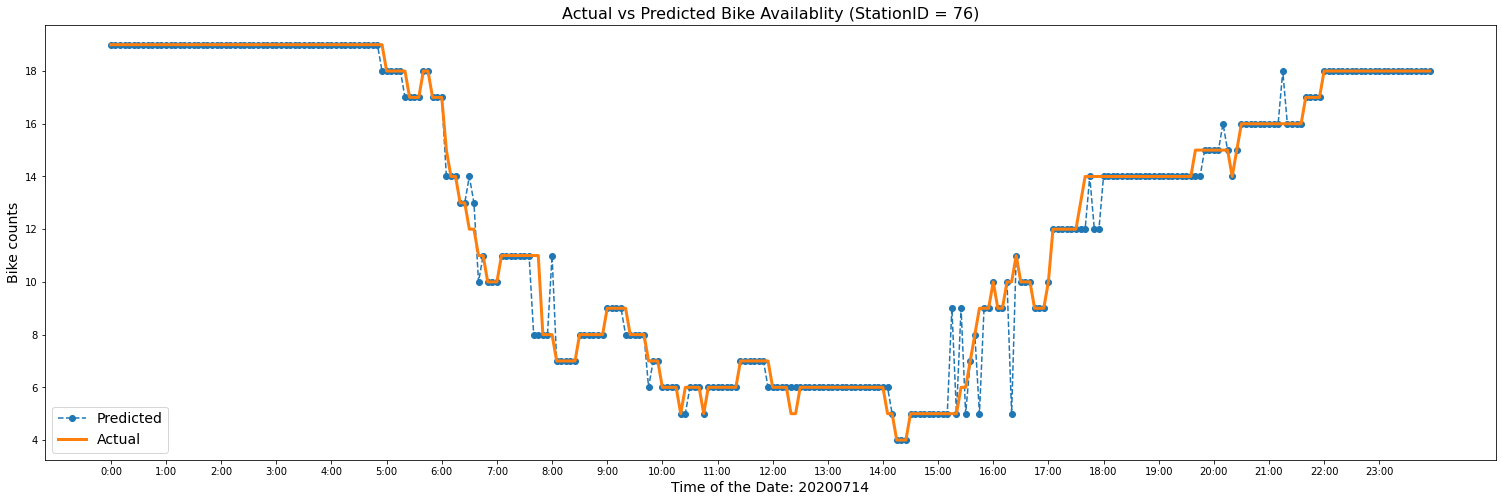

In [ ]:
date1 = 20200714
# Choose a Station that is in this Cluster
stationId = '76'
station_column_name = 'station_id_' + stationId
df1 = df_with_outliers[(df_with_outliers['date'] == date1) & \
                       (df_with_outliers[station_column_name] == 1)]

if df1.empty:
  print('DataFrame is empty!')
else:
  y_test_1 = df1['available_bikes']
  X_test_1 = df1[features]

  X_test_1 = sc.transform(X_test_1)

  y_prediction_1 = model.predict(X_test_1)

  print("MAE:", metrics.mean_absolute_error(y_test_1, y_prediction_1))
  print("MSE:", metrics.mean_squared_error(y_test_1, y_prediction_1))
  print("RMSE:", metrics.mean_squared_error(y_test_1, y_prediction_1)**0.5)
  print("R2:", metrics.r2_score(y_test_1, y_prediction_1))
  print("Accuracy:", metrics.accuracy_score(y_test_1, y_prediction_1))

  y_test_1.reset_index(inplace=True, drop=True)

  y_prediction_1 = pd.Series(y_prediction_1)

  plt.figure(figsize=(26,8))
  plt.plot(y_prediction_1, marker='o', markersize=6, linestyle='dashed', label='Predicted')
  plt.plot(y_test_1, linewidth=3, label='Actual')
  plt.title('Actual vs Predicted Bike Availablity (StationID = ' + stationId + ')', size=16)
  plt.xlabel('Time of the Date: ' + str(date1), size=14)
  plt.ylabel('Bike counts', size=14)

  x = [0]
  for i in range(0,23):
    x.append(x[i]+12)
  plt.xticks(x, ['0:00','1:00','2:00','3:00','4:00','5:00', \
                 '6:00','7:00','8:00','9:00','10:00','11:00', \
                 '12:00','13:00','14:00','15:00','16:00','17:00', \
                 '18:00','19:00','20:00','21:00','22:00','23:00'])

  plt.legend(fontsize=14)
  plt.show()

4.1.8. Save model into a file

In [ ]:
# I've already connected Google Colab with Google Drive.
# I'll save all models into my Google Drive
model_path = 'drive/MyDrive/dublinbikes/multi_station_model/cluster_' + str(cluster) + '.pbz2'
with bz2.BZ2File(model_path, 'w') as f:
  pickle.dump(model, f)

4.1.9. Save metrics of each model for report

In [ ]:
# rf: random_forest model
# mae: mean_absolute_error
# mse: mean_squared_error
# rmse: root of mean_squared_error
# r2: r2_score

# Initial DataFrame for saving these metrics
clt_metrics = pd.DataFrame(columns=['cluster','rf_mae','rf_mse','rf_rmse','rf_r2','rf_accuracy','station_list'])
clt_metrics['station_list'] = clt_metrics['station_list'].astype(str)

In [ ]:
clt_metrics.loc[cluster,'cluster'] = cluster
clt_metrics.loc[cluster,'rf_mae'] = metrics.mean_absolute_error(y_test, y_prediction)
clt_metrics.loc[cluster,'rf_mse'] = metrics.mean_squared_error(y_test, y_prediction)
clt_metrics.loc[cluster,'rf_rmse'] = metrics.mean_squared_error(y_test, y_prediction)**0.5
clt_metrics.loc[cluster,'rf_r2'] = metrics.r2_score(y_test, y_prediction)
clt_metrics.loc[cluster,'rf_accuracy'] = metrics.accuracy_score(y_test, y_prediction)

s_list = stations_df[stations_df['cluster'] == cluster]['station_id'].tolist()
string = 'id: ' + ','.join(str(e) for e in s_list)
clt_metrics.loc[cluster,'station_list'] = string

clt_metrics

,cluster,rf_mae,rf_mse,rf_rmse,rf_r2,rf_accuracy,station_list
0,0,0.501099,2.89735,1.70216,0.96414,0.767429,"id: 75,76,86,87,88,92,93,94,100"


In [ ]:
clt_metrics.to_csv('drive/MyDrive/dublinbikes/clustered_stations_metrics.csv', index=False)

# 4. Multi-station models for other Clusters

## 4.1. Build models

In [ ]:
# Read the list of Stations that are clustered before
clustered_stations = pd.read_csv('drive/MyDrive/dublinbikes/clustered_stations.csv')
clustered_stations

,address,station_id,latitude,longitude,name,cluster
0,Clarendon Row,1,53.340927,-6.262501,CLARENDON ROW,7
1,Blessington Street,2,53.356770,-6.268140,BLESSINGTON STREET,9
2,Bolton Street,3,53.351181,-6.269859,BOLTON STREET,2
3,Greek Street,4,53.346874,-6.272976,GREEK STREET,2
4,Charlemont Street,5,53.330662,-6.260177,CHARLEMONT PLACE,3
...,...,...,...,...,...,...
111,Merrion Square South,113,53.338615,-6.248606,MERRION SQUARE SOUTH,8
112,Wilton Terrace (Park),114,53.333652,-6.248345,WILTON TERRACE (PARK),8
113,Killarney Street,115,53.354843,-6.247579,KILLARNEY STREET,4
114,Broadstone,116,53.354698,-6.272314,BROADSTONE,5


In [ ]:
# Read the csv file that save the metrics for all Clusters
clt_metrics = pd.read_csv('drive/MyDrive/dublinbikes/clustered_stations_metrics.csv')
clt_metrics

,cluster,rf_mae,rf_mse,rf_rmse,rf_r2,rf_accuracy,station_list
0,0,0.565597,2.903209,1.703881,0.942597,0.738177,"id: 5,11,18,34,37,39,41,43,53,54,55"


In [ ]:
# The 1st Cluster (cluster=0) has been examined above.
# Now, we loop all the other Clusters
# Let's begin with index=1
start = 1 
# It takes lots of time to load/transform/extract data; 
# build model; compress & save the model into a file.
# To process all these steps for a Cluster, it will take about 3 minutes.
# Therefore, each time you should try 2 or 3 Clusters and observe the results
# instead of loop all 9 Clusters
end = 10

for i in range(start,end):
  cluster = i
  cls = data_clustering(original_df, clustered_stations, cluster)
  if cls is None:
    print('No data of the Cluster =', cluster)
  else:
    cls = transform_data(cls)
    cls = merge_data(cls, weather, covid_ireland, covid_dublin)
    cls = dummy_data(cls)
    #cls = remove_outliers(cls)
    # Remove remaining NA rows 
    cls.dropna(inplace=True)

    # Data for modelling is ready
    # List of features (predictors)
    features = cls.columns.to_list()
    features.remove('date')
    features.remove('available_bikes')
    y = cls['available_bikes']
    X = cls[features]

    # Split into traning and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Let's try with n_estimators=10 ==> using 10 Decision Trees
    model = RandomForestClassifier(n_estimators=10)

    model = model.fit(X_train, y_train)

    y_prediction = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_prediction)
    mse = metrics.mean_squared_error(y_test, y_prediction)
    rmse = metrics.mean_squared_error(y_test, y_prediction)**0.5
    r2 = metrics.r2_score(y_test, y_prediction)
    accuracy = metrics.accuracy_score(y_test, y_prediction)

    print("Metrics for the Cluster:", str(cluster))
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)
    print("Accuracy:", accuracy)

    # Save model into a file
    #model_path = 'drive/MyDrive/dublinbikes/multi_station_model/cluster_' + str(cluster) + '.pbz2'
    #with bz2.BZ2File(model_path, 'w') as f:
    #  pickle.dump(model, f)

    # Save metrics for this Cluster's model 
    clt_metrics.loc[cluster,'cluster'] = cluster
    clt_metrics.loc[cluster,'rf_mae'] = mae
    clt_metrics.loc[cluster,'rf_mse'] = mse
    clt_metrics.loc[cluster,'rf_rmse'] = rmse
    clt_metrics.loc[cluster,'rf_r2'] = r2
    clt_metrics.loc[cluster,'rf_accuracy'] = accuracy

    s_list = clustered_stations[clustered_stations['cluster'] == cluster]['station_id'].tolist()
    string = 'id: ' + ','.join(str(e) for e in s_list)
    clt_metrics.loc[cluster,'station_list'] = string

#-----------------------------------------------------------------------------

Metrics for the Cluster: 1
MAE: 0.42553575823535655
MSE: 2.05419563445381
RMSE: 1.4332465365225238
R2: 0.9467936434309945
Accuracy: 0.7892981572761737
Metrics for the Cluster: 2
MAE: 0.630216613560778
MSE: 3.3918607448916034
RMSE: 1.8417005035812972
R2: 0.9486070741571947
Accuracy: 0.7043752206499081
Metrics for the Cluster: 3
MAE: 0.4998079375070611
MSE: 2.582417405058184
RMSE: 1.6069901695586641
R2: 0.9611521127158518
Accuracy: 0.7588921706289643
Metrics for the Cluster: 4
MAE: 0.4999912698150947
MSE: 2.406264004671619
RMSE: 1.5512137198566867
R2: 0.9423919063383329
Accuracy: 0.7572639988514956
Metrics for the Cluster: 5
MAE: 0.8217571082299611
MSE: 4.13171674262873
RMSE: 2.0326624763173866
R2: 0.937249504373085
Accuracy: 0.6295730882880757
Metrics for the Cluster: 6
MAE: 0.5425465203309411
MSE: 3.0771813815285234
RMSE: 1.754189665209701
R2: 0.957450763165672
Accuracy: 0.7488183082984763
Metrics for the Cluster: 7
MAE: 0.6219397824778489
MSE: 2.9712944947579123
RMSE: 1.72374432406836

In [ ]:
# Save metrics info into a csv file
clt_metrics['cluster'] = clt_metrics['cluster'].astype(int)
clt_metrics.to_csv('drive/MyDrive/dublinbikes/clustered_stations_metrics.csv', index=False)

## 4.2. Examine these models

In [ ]:
clt_metrics = pd.read_csv('drive/MyDrive/dublinbikes/clustered_stations_metrics.csv')
#clt_metrics = pd.read_csv('drive/MyDrive/dublinbikes/clustered_stations_metrics_20_groups.csv')
clt_metrics.describe()

,cluster,rf_mae,rf_mse,rf_rmse,rf_r2,rf_accuracy
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.50000,0.599494,3.132705,1.758501,0.947461,0.720844
std,3.02765,0.119249,0.761732,0.211816,0.009611,0.046604
min,0.00000,0.425536,2.054196,1.433247,0.931963,0.629573
25%,2.25000,0.510630,2.662615,1.631213,0.942443,0.700285
50%,4.50000,0.593769,3.024238,1.738967,0.946789,0.721276
75%,6.75000,0.640891,3.353219,1.831087,0.955240,0.755153
max,9.00000,0.821757,4.571619,2.138134,0.961152,0.789298


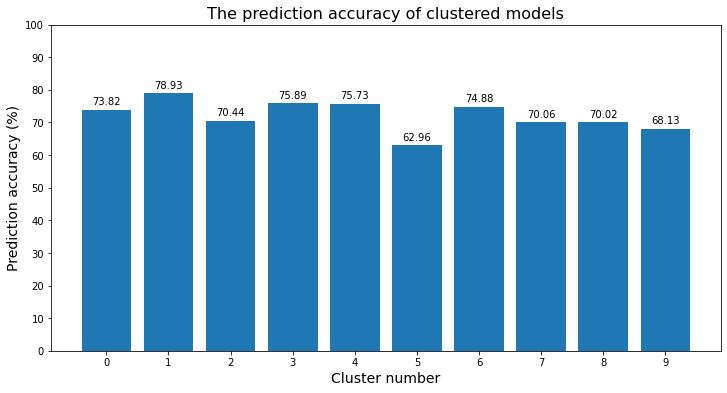

In [ ]:
# Set the figure size
fig, ax = plt.subplots(figsize=(12,6))
# Set title & axis labels
ax.set_title('The prediction accuracy of clustered models', size=16)
plt.xlabel('Cluster number', size=14)
plt.ylabel('Prediction accuracy (%)', size=14)

# Plot a bar for with the values that get from top 5 rows in flu_A_by_county
clusters = clt_metrics['cluster']
values = clt_metrics['rf_accuracy']*100

plt.bar(clusters, values)

plt.yticks(np.arange(0,101,step=10))
plt.xticks(clt_metrics.index)
# Show value for all bars
rects = ax.patches
values = values.round(2) #Show 2 decimals
for rect, value in zip(rects, values):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, value, ha='center', va='bottom')